<a href="https://colab.research.google.com/github/yimeiwen/InorganicChemistry/blob/main/Cheminformatic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Crystal Energy Band**

*   Python to access and process crystal structure
*   Predict of energy band gap



In [1]:
!pip install pymatgen

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 40.6 MB 25.9 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 514 kB 64.7 MB/s 
     |████████████████████████████████| 98 kB 8.6 MB/s 
     |████████████████████████████████| 109 kB 51.8 MB/s 
     |████████████████████████████████| 66 kB 6.1 MB/s 
     |████████████████████████████████| 500 kB 56.7 MB/s 
  Created wheel for pymatgen: filename=pymatgen-2022.0.17-cp37-cp37m-linux_x86_64.whl size=41841026 sha256=5311dab0a4bb96b14d5016297c51a82d13c6f129bbce149a14989b7321fa29e2
  Stored in directory: /root/.cache/pip/wheels/cf/f6/22/58a9be23c5f1b452770e02ff42047175eaf0f9c2f15219fc76
Successfully built pymatgen


In [2]:
#CIF Crystallographic Information File  https://www.iucr.org/resources/cif
from pymatgen.io.cif import CifParser
from urllib.request import urlopen
request=urlopen('https://raw.githubusercontent.com/yimeiwen/cheminformatic/main/Li10Ge(PS6)2_mp-696128_computed.cif.txt')
cifFile=request.read().decode('utf-8')
parser=CifParser.from_string(cifFile)

In [27]:
structure=parser.get_structures()
print(structure[0])


Full Formula (Zn18 Fe8)
Reduced Formula: Zn9Fe4
abc   :   7.773250   7.773250   7.773250
angles: 109.471221 109.471221 109.471221
Sites (26)
  #  SP           a         b         c
---  ----  --------  --------  --------
  0  Zn    0.356237  0         0.751283
  1  Zn    0.751283  0         0.356237
  2  Zn    0.248717  0.604954  0.248717
  3  Zn    0.604954  0.248717  0.248717
  4  Zn    0.643763  0.395046  0.643763
  5  Zn    0.395046  0.643763  0.643763
  6  Zn    1         0.751283  0.356237
  7  Zn    1         0.356237  0.751283
  8  Zn    0.356237  0.751283  0
  9  Zn    0.643763  0.643763  0.395046
 10  Zn    0.248717  0.248717  0.604954
 11  Zn    0.751283  0.356237  0
 12  Zn    0         0.643607  0.643607
 13  Zn    0         0.356393  0.356393
 14  Zn    0.356393  0.356393  0
 15  Zn    0.643607  0.643607  0
 16  Zn    0.356393  0         0.356393
 17  Zn    0.643607  0         0.643607
 18  Fe    0.206521  0         0
 19  Fe    0         0         0.206521
 20  Fe    0  

site: 50 atoms in the crystal

In [5]:
structure=structure[0]
print(structure.lattice)
print(structure.species)
print(structure.charge)
print(structure.cart_coords)
print(structure.atomic_numbers)

8.787646 0.000000 0.000000
0.000000 8.787646 0.000000
0.000000 0.000000 12.657546
[Element Li, Element Li, Element Li, Element Li, Element Li, Element Li, Element Li, Element Li, Element Li, Element Li, Element Li, Element Li, Element Li, Element Li, Element Li, Element Li, Element Li, Element Li, Element Li, Element Li, Element Ge, Element Ge, Element P, Element P, Element P, Element P, Element S, Element S, Element S, Element S, Element S, Element S, Element S, Element S, Element S, Element S, Element S, Element S, Element S, Element S, Element S, Element S, Element S, Element S, Element S, Element S, Element S, Element S, Element S, Element S]
0.0
[[2.00971706e+00 2.39858798e+00 3.72844472e+00]
 [6.77792894e+00 6.38905802e+00 3.72844472e+00]
 [2.39858798e+00 6.77792894e+00 1.00572177e+01]
 [6.38905802e+00 2.00971706e+00 1.00572177e+01]
 [2.00971706e+00 6.38905802e+00 3.72844472e+00]
 [6.77792894e+00 2.39858798e+00 3.72844472e+00]
 [2.39858798e+00 2.00971706e+00 1.00572177e+01]
 [6.3

In [6]:
from pymatgen.ext.matproj import MPRester
from pymatgen.ext.matproj import MPRestError
m=MPRester('Ua7LfrKkn9yTWA3t')


In [7]:
results=m.query({"band_gap": {'$gt': 6}},properties=['material_id'])

100%|██████████| 845/845 [00:00<00:00, 933.36it/s]


In [8]:
print(len(results))
results[0:10]

845


[{'material_id': 'mp-1001080'},
 {'material_id': 'mp-1004528'},
 {'material_id': 'mp-1017626'},
 {'material_id': 'mp-1019509'},
 {'material_id': 'mp-1019539'},
 {'material_id': 'mp-1019741'},
 {'material_id': 'mp-1019742'},
 {'material_id': 'mp-1019804'},
 {'material_id': 'mp-1020018'},
 {'material_id': 'mp-1020022'}]


1.   Avg of atomic numbers of all elements in the crystal
2.  Avg of ionization potential of atoms
1.   Avg of electron affinity of the atoms









In [20]:
results=m.query({'material_id':'mp-1207450'},properties=['cif','band_gap'])
cifFile=results[0]['cif']
parser=CifParser.from_string(cifFile)
structure=parser.get_structures()

In [10]:
import numpy as np
structure=structure[0]
mean_atomic_number=np.mean(structure.atomic_numbers)
max_atomic_number=np.max(structure.atomic_numbers)
min_atomic_number=np.min(structure.atomic_numbers)
std_atomic_number=np.std(structure.atomic_numbers)
print(mean_atomic_number,mean_atomic_number,mean_atomic_number,std_atomic_number)

28.76923076923077 28.76923076923077 28.76923076923077 1.8461538461538463


Collecting the structures

Pre processing the data

In [23]:
new_res=m.query({'formula_anonymous': 'ABC3'}, properties=['cif','band_gap'])



100%|██████████| 4358/4358 [00:04<00:00, 1006.61it/s]


In [24]:
def descriptors(cif):
    atomic_numbers=[]
    distance_matrix=[]
    van_der_waals_radius=[]
    electrical_resistivity = []
    velocity_of_sound = []
    reflectivity = []
    poissons_ratio = []
    molar_volume = []
    thermal_conductivity = []
    melting_point = []
    critical_temperature = []
    superconduction_temperature = []
    liquid_range = []
    bulk_modulus = []
    youngs_modulus = []
    brinell_hardness = []
    rigidity_modulus = []
    mineral_hardness = []
    vickers_hardness = []
    density_of_solid = []
    coefficient_of_linear_thermal_expansion = []
    average_ionic_radius = []
    average_cationic_radius = []
    average_anionic_radius = []


    parser = CifParser.from_string(cif)

    structure = parser.get_structures()
    structure = structure[0]

    numElements = len(structure.atomic_numbers)

    num_metals = 0
    for e in structure.species:
        if e.Z in range(3, 4+1) or e.Z in range(11, 12+1) or e.Z in range(19, 30+1) or e.Z in range(37, 48+1) or e.Z in range(55, 80 + 1) or e.Z in range(87, 112+1):
            num_metals += 1
    metals_fraction = num_metals/numElements

    spg = structure.get_space_group_info()

    spacegroup_numbers = {}
    for i in range(1, 231):
        spacegroup_numbers[i] = 0

    spacegroup_numbers[spg[1]] = 1

    spacegroup_numbers_list = [] #one-hot encoding
    for i in range(1, 231):
        spacegroup_numbers_list += [spacegroup_numbers[i]]

    atomic_numbers = [np.mean(structure.atomic_numbers), np.max(structure.atomic_numbers), np.min(
        structure.atomic_numbers), np.std(structure.atomic_numbers)]

    # Lattice parameters:
    a_parameters = structure.lattice.abc[0]
    b_parameters = structure.lattice.abc[1]
    c_parameters = structure.lattice.abc[2]
    alpha_parameters = structure.lattice.angles[0]
    beta_parameters = structure.lattice.angles[1]
    gamma_parameters = structure.lattice.angles[2]

    distance_matrix += [np.mean(structure.distance_matrix), np.max(structure.distance_matrix),
                        np.min(structure.distance_matrix), np.std(structure.distance_matrix)]

    e1, e2, e3, e4, e5, e6, e7, e8, e9, e10, e11, e12, e13, e14, e15, e16, e17, e18, e19, e20, e21, e22, e23 = [
    ], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], []
    for e in structure.species:
        e1 += [e.van_der_waals_radius]
        e2 += [e.electrical_resistivity]
        e3 += [e.velocity_of_sound]
        e4 += [e.reflectivity]
        e6 += [e.poissons_ratio]
        e7 += [e.molar_volume]
        e8 += [e.thermal_conductivity]
        e9 += [e.melting_point]
        e10 += [e.critical_temperature]
        e11 += [e.superconduction_temperature]
        e12 += [e.liquid_range]
        e13 += [e.bulk_modulus]
        e14 += [e.youngs_modulus]
        e15 += [e.brinell_hardness]
        e16 += [e.rigidity_modulus]
       
        e18 += [e.vickers_hardness]
        e19 += [e.density_of_solid]
        e20 += [e.coefficient_of_linear_thermal_expansion]
        e21 += [e.average_ionic_radius]
        e22 += [e.average_cationic_radius]
        e23 += [e.average_anionic_radius]

    e1 = [0 if v is None else v for v in e1]
    e2 = [0 if v is None else v for v in e2]
    e3 = [0 if v is None else v for v in e3]
    e4 = [0 if v is None else v for v in e4]
    # e5=[0 if v is None else v for v in e5]
    e6 = [0 if v is None else v for v in e6]
    e7 = [0 if v is None else v for v in e7]
    e8 = [0 if v is None else v for v in e8]
    e9 = [0 if v is None else v for v in e9]
    e10 = [0 if v is None else v for v in e10]
    e11 = [0 if v is None else v for v in e11]
    e12 = [0 if v is None else v for v in e12]
    e13 = [0 if v is None else v for v in e13]
    e14 = [0 if v is None else v for v in e14]
    e15 = [0 if v is None else v for v in e15]
    e16 = [0 if v is None else v for v in e16]
    # e17=[0 if v is None else v for v in e17]
    e18 = [0 if v is None else v for v in e18]
    e19 = [0 if v is None else v for v in e19]
    e20 = [0 if v is None else v for v in e20]
    e21 = [0 if v is None else v for v in e21]
    e22 = [0 if v is None else v for v in e22]
    e23 = [0 if v is None else v for v in e23]

    van_der_waals_radius = [np.mean(e1), np.max(e1), np.min(e1), np.std(e1)]
    electrical_resistivity = [np.mean(e2), np.max(e2), np.min(e2), np.std(e2)]
    velocity_of_sound = [np.mean(e3), np.max(e3), np.min(e3), np.std(e3)]
    reflectivity = [np.mean(e4), np.max(e4), np.min(e4), np.std(e4)]
    poissons_ratio = [np.mean(e6), np.max(e6), np.min(e6), np.std(e6)]
    molar_volume = [np.mean(e7), np.max(e7), np.min(e7), np.std(e7)]
    thermal_conductivity = [np.mean(e8), np.max(e8), np.min(e8), np.std(e8)]
    melting_point = [np.mean(e9), np.max(e9), np.min(e9), np.std(e9)]
    critical_temperature = [np.mean(e10), np.max(
        e10), np.min(e10), np.std(e10)]
    superconduction_temperature = [
        np.mean(e11), np.max(e11), np.min(e11), np.std(e11)]
    liquid_range = [np.mean(e12), np.max(e12), np.min(e12), np.std(e12)]
    bulk_modulus = [np.mean(e13), np.max(e13), np.min(e13), np.std(e13)]
    youngs_modulus = [np.mean(e14), np.max(e14), np.min(e14), np.std(e14)]
    brinell_hardness = [np.mean(e15), np.max(e15), np.min(e15), np.std(e15)]
    rigidity_modulus = [np.mean(e16), np.max(e16), np.min(e16), np.std(e16)]
    vickers_hardness = [np.mean(e18), np.max(e18), np.min(e18), np.std(e18)]
    density_of_solid = [np.mean(e19), np.max(e19), np.min(e19), np.std(e19)]
    coefficient_of_linear_thermal_expansion = [
        np.mean(e20), np.max(e20), np.min(e20), np.std(e20)]
    average_ionic_radius = [np.mean(e21), np.max(
        e21), np.min(e21), np.std(e21)]
    average_cationic_radius = [
        np.mean(e22), np.max(e22), np.min(e22), np.std(e22)]
    average_anionic_radius = [
        np.mean(e23), np.max(e23), np.min(e23), np.std(e23)]

    V = structure.volume

    volume_per_atom = V / numElements

    atom_volume = 0
    for e in structure.species:
        atom_volume += 4/3*np.pi*e.average_ionic_radius**3
    empty_volume = V - atom_volume

    descriptors_list = atomic_numbers +\
        [volume_per_atom] +\
        [empty_volume] +\
        [metals_fraction] +\
        distance_matrix +\
        van_der_waals_radius +\
        electrical_resistivity +\
        velocity_of_sound +\
        reflectivity +\
        poissons_ratio +\
        molar_volume +\
        thermal_conductivity +\
        melting_point +\
        critical_temperature +\
        superconduction_temperature +\
        liquid_range +\
        bulk_modulus +\
        youngs_modulus +\
        brinell_hardness +\
        rigidity_modulus +\
        vickers_hardness +\
        density_of_solid +\
        coefficient_of_linear_thermal_expansion +\
        average_ionic_radius +\
        average_cationic_radius +\
        average_anionic_radius +\
        spacegroup_numbers_list
    return descriptors_list

descriptors(cifFile)

[28.76923076923077,
 30,
 26,
 1.8461538461538463,
 13.906334543433534,
 289.42127491157754,
 1.0,
 3.3444725788623004,
 4.6814560708645185,
 0.0,
 1.0238412636257321,
 2.019230769230769,
 2.04,
 2.01,
 0.01384615384615396,
 7.23076923076923e-08,
 1e-07,
 6e-08,
 1.8461538461538464e-08,
 4072.3076923076924,
 4910.0,
 3700.0,
 558.4615384615385,
 75.38461538461539,
 80.0,
 65.0,
 6.923076923076923,
 0.2623076923076923,
 0.29,
 0.25,
 0.01846153846153845,
 8.523076923076925,
 9.16,
 7.09,
 0.9553846153846155,
 107.6923076923077,
 120.0,
 80.0,
 18.461538461538463,
 1036.7784615384614,
 1811.0,
 692.68,
 516.1476923076923,
 0.0,
 0,
 0,
 0.0,
 0.5884615384615385,
 0.85,
 0.0,
 0.3923076923076923,
 744.4523076923076,
 1323.0,
 487.32,
 385.6984615384616,
 100.76923076923077,
 170.0,
 70.0,
 46.15384615384615,
 139.69230769230768,
 211.0,
 108.0,
 47.53846153846154,
 436.0,
 490.0,
 412.0,
 36.0,
 55.0,
 82.0,
 43.0,
 18.0,
 187.07692307692307,
 608.0,
 0.0,
 280.6153846153846,
 7365.846153

iterate through list of results and extractdescriptors into the list


In [34]:
import pandas as pd
band_gaps=[]
dataset=[]
counter=0
for r in new_res:
  cif=r['cif']
  bg=r['band_gap']
  parser=CifParser.from_string(cif)

  structure=parser.get_structures()
  structure=structure[0]
  dataset +=[descriptors(cif)]
  band_gaps +=[bg]
  print(counter)
  counter+=1

dataset_df=pd.DataFrame(dataset)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47


/usr/local/lib/python3.7/dist-packages/pymatgen/io/cif.py:1164: UserWarning: Issues encountered while parsing CIF: Some fractional co-ordinates rounded to ideal values to avoid issues with finite precision.
  warnings.warn("Issues encountered while parsing CIF: %s" % "\n".join(self.warnings))


48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
277
278
279
280
281
282
283
284
285
286
287
288
289
290
291
292
293
294
295
296
297
298
299
300
301
302
303
304
305
306
307
308
309
310


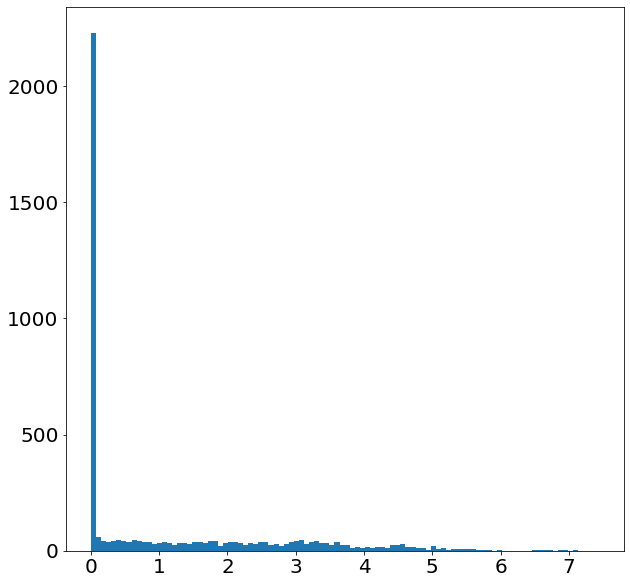

In [37]:
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 20})
plt.figure(figsize=(10,10))
plt.hist(band_gaps,bins=100)
plt.savefig('histogram_bandgap',bbox_inches='tight')


bandgap == 0 is metal, might be a problem for predicting bandgap as they are 0



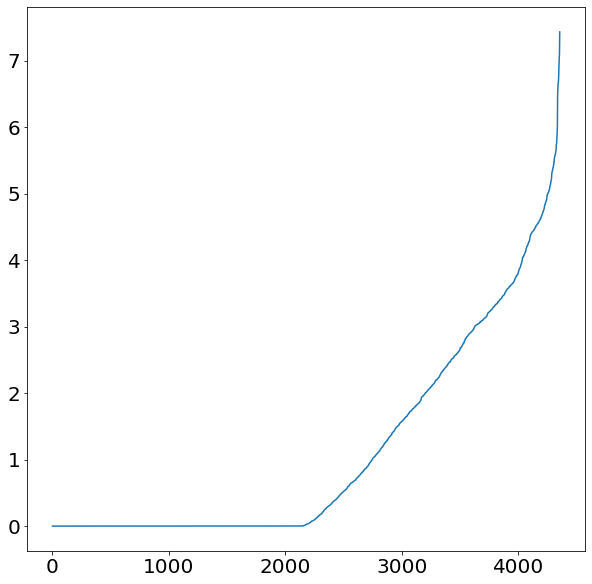

In [39]:
band_gaps_sorted=sorted(band_gaps)
#scatter plot
plt.figure(figsize=(10,10))
plt.plot(band_gaps_sorted)
plt.savefig('ScatterPlot',bbox_inches='tight')

# 2 Machine Learning Models

In [44]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(dataset_df,band_gaps,test_size=.2,random_state=1)

from sklearn.preprocessing import StandardScaler
scaler=StandardScaler().fit(X_train)
X_train_scaled=scaler.transform(X_train)
X_test_scaled=scaler.transform(X_test)

In [46]:
from sklearn.metrics import mean_absolute_error,r2_score
from xgboost import XGBRegressor
from sklearn.ensemble import RandomForestRegressor

In [47]:
regr=RandomForestRegressor(n_estimators=400,max_depth=400,random_state=0)
regr.fit(X_train_scaled,y_train)
y_predicted=regr.predict(X_test_scaled)

print('RF MAE\t' +str(mean_absolute_error(y_test,y_predicted))+'\n')
print('RF R2\t' +str(r2_score(y_test,y_predicted))+'\n')

RF MAE	0.5047731953363913

RF R2	0.7070883610922807



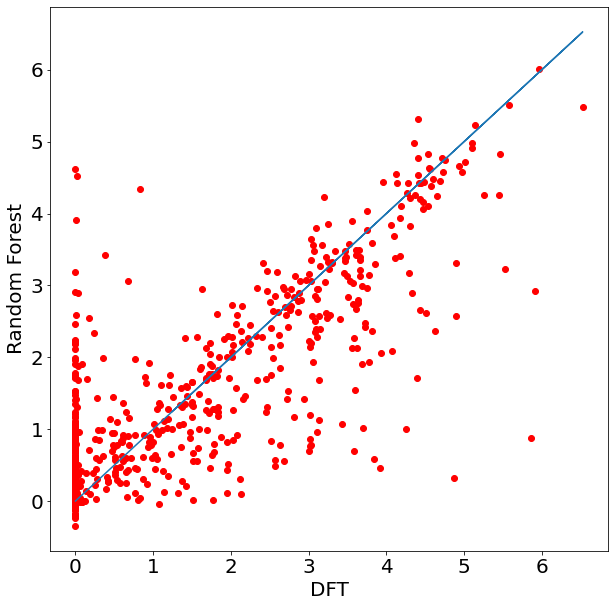

In [85]:
xPlot=y_test
yPlot=y_predicted
plt.figure(figsize=(10,10))
plt.plot(xPlot,yPlot,'ro')
plt.plot(xPlot,xPlot)
plt.ylabel('Random Forest')
plt.xlabel('DFT')
plt.savefig('RF_Correlation_Test', bbox_inches='tight')



In [54]:
regr2=XGBRegressor(objective='reg:squarederror',max_depth=10,n_estimators=400)
regr2.fit(X_train_scaled, y_train)
y_predicted=regr2.predict(X_test_scaled)


print('XGBOOST MAE\t' +str(mean_absolute_error(y_test,y_predicted))+'\n')
print('XGBOOST R2\t' +str(r2_score(y_test,y_predicted))+'\n')



XGBOOST MAE	0.48111563232617643

XGBOOST R2	0.6978223899513187



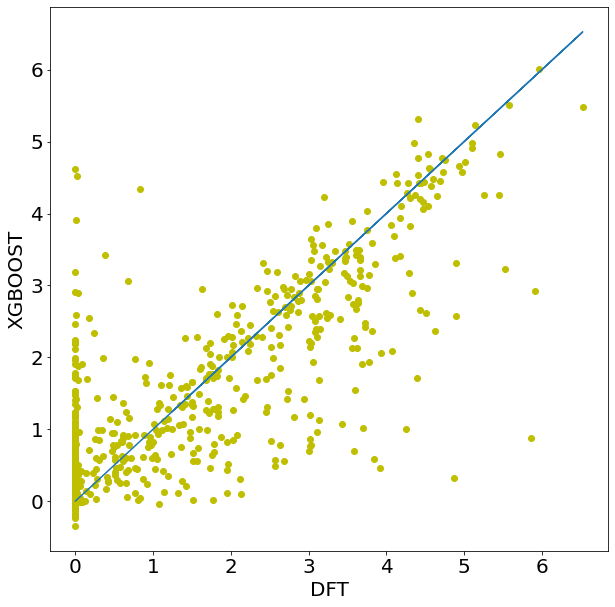

In [60]:
xPlot=y_test
yPlot=y_predicted
plt.figure(figsize=(10,10))
plt.plot(xPlot,yPlot,'yo')
plt.plot(xPlot,xPlot)
plt.ylabel('XGBOOST')
plt.xlabel('DFT')
plt.savefig('XGBOOST_Correlation_Test', bbox_inches='tight')